# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using DecisionTree: print_tree
using Plots
using StatsBase

include("../../lib.jl")

ENV["LINES"]=30;

# Data

In [76]:
data = CSV.read("data.csv")

,Class,Instance,Nucleotide_Sequence
,String,String,String
1,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


In [81]:
function separate_bases(df)
    d = map(s->[i for i in strip(s)], data[:,3])
    a = zeros(size(d)[1], size(d[1])[1])
    
    for i in 1:size(a)[1]
        a[i,:] = d[i]
    end
    
    return DataFrame(a)
end

separate_bases (generic function with 1 method)

In [82]:
separate_bases(data)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,67.0,67.0,65.0,71.0,67.0,84.0,71.0,67.0,65.0
2,65.0,71.0,65.0,67.0,67.0,67.0,71.0,67.0,67.0
3,71.0,65.0,71.0,71.0,84.0,71.0,65.0,65.0,71.0
4,71.0,71.0,71.0,67.0,84.0,71.0,67.0,71.0,84.0
5,71.0,67.0,84.0,67.0,65.0,71.0,67.0,67.0,67.0
6,67.0,65.0,71.0,65.0,67.0,84.0,71.0,71.0,71.0
7,67.0,67.0,84.0,84.0,84.0,71.0,65.0,71.0,71.0
8,67.0,67.0,67.0,84.0,67.0,71.0,84.0,71.0,67.0
9,84.0,71.0,71.0,67.0,71.0,65.0,67.0,84.0,65.0


In [55]:
?DataFrame()

```
DataFrame <: AbstractDataFrame
```

An AbstractDataFrame that stores a set of named columns

The columns are normally AbstractVectors stored in memory, particularly a Vector or CategoricalVector.

# Constructors

```julia
DataFrame(columns::AbstractVector, names::AbstractVector{Symbol};
          makeunique::Bool=false, copycols::Bool=true)
DataFrame(columns::AbstractVector, names::AbstractVector{<:AbstractString};
          makeunique::Bool=false, copycols::Bool=true)
DataFrame(columns::NTuple{N,AbstractVector}, names::NTuple{N,Symbol};
          makeunique::Bool=false, copycols::Bool=true)
DataFrame(columns::NTuple{N,AbstractVector}, names::NTuple{N,<:AbstractString};
          makeunique::Bool=false, copycols::Bool=true)
DataFrame(columns::Matrix, names::AbstractVector{Symbol}; makeunique::Bool=false)
DataFrame(columns::Matrix, names::AbstractVector{<:AbstractString};
          makeunique::Bool=false)
DataFrame(kwargs...)
DataFrame(pairs::Pair{Symbol,<:Any}...; makeunique::Bool=false, copycols::Bool=true)
DataFrame(pairs::Pair{<:AbstractString,<:Any}...; makeunique::Bool=false,
          copycols::Bool=true)
DataFrame() # an empty DataFrame
DataFrame(column_eltypes::AbstractVector, names::AbstractVector{Symbol},
          nrows::Integer=0; makeunique::Bool=false)
DataFrame(column_eltypes::AbstractVector, names::AbstractVector{<:AbstractString},
          nrows::Integer=0; makeunique::Bool=false)
DataFrame(ds::AbstractDict; copycols::Bool=true)
DataFrame(table; makeunique::Bool=false, copycols::Bool=true)
DataFrame(::Union{DataFrame, SubDataFrame}; copycols::Bool=true)
DataFrame(::GroupedDataFrame; keepkeys::Bool=true)
```

# Arguments

  * `columns` : a Vector with each column as contents or a Matrix
  * `names` : the column names
  * `makeunique` : if `false` (the default), an error will be raised if duplicates in `names` are found; if `true`, duplicate names will be suffixed with `_i` (`i` starting at 1 for the first duplicate).
  * `kwargs` : the key gives the column names, and the value is the column contents; note that the `copycols` keyword argument indicates if if vectors passed as columns should be copied so it is not possible to create a column whose name is `:copycols` using this constructor
  * `t` : elemental type of all columns
  * `nrows`, `ncols` : number of rows and columns
  * `column_eltypes` : element type of each column
  * `categorical` : a vector of `Bool` indicating which columns should be converted to `CategoricalVector`
  * `ds` : `AbstractDict` of columns
  * `table` : any type that implements the [Tables.jl](https://github.com/JuliaData/Tables.jl) interface; in particular a tuple or vector of `Pair{Symbol, <:AbstractVector}}` objects is a table.
  * `copycols` : whether vectors passed as columns should be copied; if set to `false` then the constructor will still copy the passed columns if it is not possible to construct a `DataFrame` without materializing new columns.

All columns in `columns` must be `AbstractVector`s and have the same length. An exception are `DataFrame(kwargs...)` and `DataFrame(pairs::Pair...)` form constructors which additionally allow a column to be of any other type that is not an `AbstractArray`, in which case the passed value is automatically repeated to fill a new vector of the appropriate length. As a particular rule values stored in a `Ref` or a `0`-dimensional `AbstractArray` are unwrapped and treated in the same way.

Additionally `DataFrame` can be used to collect a [`GroupedDataFrame`](@ref) into a `DataFrame`. In this case the order of rows in the result follows the order of groups in the `GroupedDataFrame` passed.

# Notes

The `DataFrame` constructor by default copies all columns vectors passed to it. Pass `copycols=false` to reuse vectors without copying them

If a column is passed to a `DataFrame` constructor or is assigned as a whole using `setindex!` then its reference is stored in the `DataFrame`. An exception to this rule is assignment of an `AbstractRange` as a column, in which case the range is collected to a `Vector`.

Because column types can vary, a `DataFrame` is not type stable. For performance-critical code, do not index into a `DataFrame` inside of loops.

# Examples

```julia
df = DataFrame()
v = ["x","y","z"][rand(1:3, 10)]
df1 = DataFrame(Any[collect(1:10), v, rand(10)], [:A, :B, :C])
df2 = DataFrame(A = 1:10, B = v, C = rand(10))
summary(df1)
describe(df2)
first(df1, 10)
df1.B
df2[!, :C]
df1[:, :A]
df1[1:4, 1:2]
df1[Not(1:4), Not(1:2)]
df1[1:2, [:A,:C]]
df1[1:2, r"[AC]"]
df1[:, [:A,:C]]
df1[:, [1,3]]
df1[1:4, :]
df1[1:4, :C]
df1[1:4, :C] = 40. * df1[1:4, :C]
[df1; df2]  # vcat
[df1 df2]  # hcat
size(df1)
```


In [9]:
data = data[:,Not([2])]

,Class,Nucleotide_Sequence
,String,String
1,EI,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


Look at class labels to see if dataset is imbalanced

In [8]:
label_counts = countmap(data[:(Class)])

Dict{String,Int64} with 3 entries:
  "IE" => 768
  "EI" => 767
  "N"  => 1655

In [20]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

3-element Array{Float64,1}:
 0.0784
 0.4608
 0.4608

Get data ready for training

In [71]:
coerce!(data, :Class_Name=>Multiclass,
              :Left_Weight=>Continuous,
              :Right_Weight=>Continuous,
              :Left_Distance=>Continuous,
              :Right_Distance=>Continuous)
schema(data)

┌────────────────┬─────────────────────────────────┬───────────────┐
│ _.names        │ _.types                         │ _.scitypes    │
├────────────────┼─────────────────────────────────┼───────────────┤
│ Class_Name     │ CategoricalValue{String,UInt32} │ Multiclass{3} │
│ Left_Weight    │ Float64                         │ Continuous    │
│ Left_Distance  │ Float64                         │ Continuous    │
│ Right_Weight   │ Float64                         │ Continuous    │
│ Right_Distance │ Float64                         │ Continuous    │
└────────────────┴─────────────────────────────────┴───────────────┘
_.nrows = 625


In [72]:
y, X = unpack(data, ==(:Class_Name), colname->true)

(CategoricalValue{String,UInt32}["B", "R", "R", "R", "R", "R", "R", "R", "R", "R"  …  "L", "L", "L", "L", "L", "L", "L", "L", "L", "B"], 625×4 DataFrame
│ Row │ Left_Weight │ Left_Distance │ Right_Weight │ Right_Distance │
│     │ Float64     │ Float64       │ Float64      │ Float64        │
├─────┼─────────────┼───────────────┼──────────────┼────────────────┤
│ 1   │ 1.0         │ 1.0           │ 1.0          │ 1.0            │
│ 2   │ 1.0         │ 1.0           │ 1.0          │ 2.0            │
│ 3   │ 1.0         │ 1.0           │ 1.0          │ 3.0            │
│ 4   │ 1.0         │ 1.0           │ 1.0          │ 4.0            │
│ 5   │ 1.0         │ 1.0           │ 1.0          │ 5.0            │
│ 6   │ 1.0         │ 1.0           │ 2.0          │ 1.0            │
│ 7   │ 1.0         │ 1.0           │ 2.0          │ 2.0            │
│ 8   │ 1.0         │ 1.0           │ 2.0          │ 3.0            │
│ 9   │ 1.0         │ 1.0           │ 2.0          │ 4.0            │
│ 10  │

Partition train and test data accoring to class labels

In [73]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:Class_Name])) # gives 70:30 split

([595, 102, 55, 568, 425, 389, 146, 63, 372, 250  …  195, 500, 571, 533, 112, 396, 297, 106, 303, 261], [444, 144, 546, 43, 19, 173, 365, 423, 27, 218  …  293, 614, 90, 471, 13, 134, 296, 79, 395, 415])

In [74]:
train_counts = countmap(data[train,:Class_Name])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

3-element Array{Float64,1}:
 0.0776255707762557
 0.4611872146118721
 0.4611872146118721

In [75]:
test_counts = countmap(data[test,:Class_Name])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

3-element Array{Float64,1}:
 0.08021390374331551
 0.45989304812834225
 0.45989304812834225

# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [76]:
models(matching(X,y))

42-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_na

In [77]:
@load DecisionTreeClassifier verbosity=2

import MLJModels ✔
import DecisionTree ✔
import MLJModels.DecisionTree_ ✔


┌ Info: Loading into module "Main": 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:70


DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = false,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 5) @083

## Decision trees
* Be sure to use some form of pruning. 
* You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.

1. https://alan-turing-institute.github.io/MLJ.jl/dev/transformers/#MLJModels.UnivariateDiscretizer
1. https://alan-turing-institute.github.io/MLJ.jl/dev/getting_started/#Getting-Started-1

### No post-pruning

In [78]:
dt = DecisionTreeClassifier(post_prune=false, display_depth=8)

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = false,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 8) @963

In [79]:
Tree = machine(dt, X, y)

Machine{DecisionTreeClassifier} @227 trained 0 times.
  args: 
    1:	Source @176 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @527 ⏎ `AbstractArray{Multiclass{3},1}`


In [80]:
fit!(Tree, rows=train, verbosity=2)

┌ Info: Training Machine{DecisionTreeClassifier} @227.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Feature 4, Threshold 2.5
L-> Feature 2, Threshold 2.5
    L-> Feature 1, Threshold 1.5
        L-> Feature 3, Threshold 2.5
            L-> Feature 4, Threshold 1.5
                L-> Feature 3, Threshold 1.5
                    L-> 1 : 1/1
                    R-> Feature 2, Threshold 1.5
                        L-> 3 : 1/1
                        R-> 1 : 1/1
                R-> 3 : 3/3
            R-> 3 : 11/11
        R-> Feature 3, Threshold 2.5
            L-> Feature 1, Threshold 2.5
                L-> Feature 4, Threshold 1.5
                    L-> Feature 3, Threshold 1.5
                        L-> 2 : 2/2
                        R-> Feature 2, Threshold 1.5
                            L-> 1 : 1/1
                            R-> 2 : 1/1
                    R-> 1 : 2/2
                R-> Feature 2, Threshold 1.5
                    L-> Feature 3, Threshold 1.5
                        L-> 2 : 4/4
                        R-> Feature 1, Threshold 4.5
                           

Machine{DecisionTreeClassifier} @227 trained 1 time.
  args: 
    1:	Source @176 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @527 ⏎ `AbstractArray{Multiclass{3},1}`


In [81]:
dt_acc = evaluate!(Tree, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:04


┌───────────────┬───────────────┬─────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                              │
├───────────────┼───────────────┼─────────────────────────────────────────┤
│ cross_entropy │ 7.84          │ [8.24, 9.01, 5.89, 9.01, 5.55, 9.36]    │
│ acc           │ 0.782         │ [0.771, 0.75, 0.837, 0.75, 0.846, 0.74] │
└───────────────┴───────────────┴─────────────────────────────────────────┘
_.per_observation = [[[2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [82]:
fitted_params(Tree) 
# print_tree(Tree.fitresult[1])

(tree = Decision Tree
Leaves: 133
Depth:  11,
 encoding = Dict{CategoricalValue{String,UInt32},UInt32}("B" => 0x00000001,"L" => 0x00000002,"R" => 0x00000003),)

In [83]:
report(Tree)

(classes_seen = CategoricalValue{String,UInt32}["B", "L", "R"],
 print_tree = TreePrinter object (call with display depth),)

### Using Post-pruning

In [100]:
dt2 = DecisionTreeClassifier(post_prune=true)

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 5) @598

In [101]:
Tree2 = machine(dt2, X, y)

Machine{DecisionTreeClassifier} @818 trained 0 times.
  args: 
    1:	Source @139 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @098 ⏎ `AbstractArray{Multiclass{3},1}`


In [102]:
fit!(Tree2, rows=train, verbosity=2, force=true)

Feature 4, Threshold 2.5
L-> Feature 2, Threshold 2.5
    L-> Feature 1, Threshold 1.5
        L-> Feature 3, Threshold 2.5
            L-> Feature 4, Threshold 1.5
                L-> 
                R-> 3 : 3/3
            R-> 3 : 11/11
        R-> Feature 3, Threshold 2.5
            L-> Feature 1, Threshold 2.5
                L-> 
                R-> 
            R-> Feature 2, Threshold 1.5
                L-> 
                R-> 
    R-> Feature 1, Threshold 2.5
        L-> Feature 3, Threshold 2.5
            L-> Feature 3, Threshold 1.5
                L-> 2 : 11/11
                R-> 
            R-> Feature 1, Threshold 1.5
                L-> 
                R-> 
        R-> 2 : 66/66
R-> Feature 1, Threshold 2.5
    L-> Feature 3, Threshold 2.5
        L-> Feature 2, Threshold 3.5
            L-> Feature 1, Threshold 1.5
                L-> 3 : 13/13
                R-> 
            R-> Feature 1, Threshold 1.5
                L-> 
                R-> 
        R-> Feat

┌ Info: Training Machine{DecisionTreeClassifier} @818.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{DecisionTreeClassifier} @818 trained 1 time.
  args: 
    1:	Source @139 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @098 ⏎ `AbstractArray{Multiclass{3},1}`


In [103]:
dt_acc = evaluate!(Tree2, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────┬───────────────┬───────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                │
├───────────────┼───────────────┼───────────────────────────────────────────┤
│ cross_entropy │ 8.07          │ [7.55, 10.7, 7.28, 7.97, 7.62, 7.28]      │
│ acc           │ 0.776         │ [0.79, 0.702, 0.798, 0.779, 0.788, 0.798] │
└───────────────┴───────────────┴───────────────────────────────────────────┘
_.per_observation = [[[2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [36.0, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 36.0, ..., 2.22e-16]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [104]:
# evaluate!(Tree2, resampling=CV(shuffle=true), measure=[tnr,tpr,fnr,fpr], verbosity=1, operation=predict_mode)

In [105]:
fitted_params(Tree2) 
# print_tree(Tree.fitresult[1])

(tree = Decision Tree
Leaves: 138
Depth:  12,
 encoding = Dict{CategoricalValue{String,UInt32},UInt32}("B" => 0x00000001,"L" => 0x00000002,"R" => 0x00000003),)

In [106]:
report(Tree2)

(classes_seen = CategoricalValue{String,UInt32}["B", "L", "R"],
 print_tree = TreePrinter object (call with display depth),)

### GridSearch / RandomSearch

In [107]:
vals = collect(0:.01:1)
r = range(dt2, :merge_purity_threshold, values=vals)
# r = range(nn2, :epochs, lower=0, upper=max_epochs)
curve = learning_curve(Tree2, 
                        range=r, 
#                         resampling=Holdout(fraction_train=0.7), 
                        resampling=CV(), 
                        measure=cross_entropy, 
                        acceleration=CPUThreads())

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @017.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 101 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 101 metamodels: 100%[=========================] Time: 0:00:02


(parameter_name = "merge_purity_threshold",
 parameter_scale = :none,
 parameter_values = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0],
 measurements = [0.9594991876228448, 0.9594991876228448, 0.9594991876228448, 0.9594991876228448, 0.9594991876228448, 0.9594991876228448, 0.9594991876228448, 0.9594991876228448, 0.9594991876228448, 0.9594991876228448  …  7.091005680490233, 7.091005680490233, 7.091005680490233, 7.091005680490233, 7.091005680490233, 7.091005680490233, 7.091005680490233, 7.091005680490233, 7.091005680490233, 7.091005680490233],)

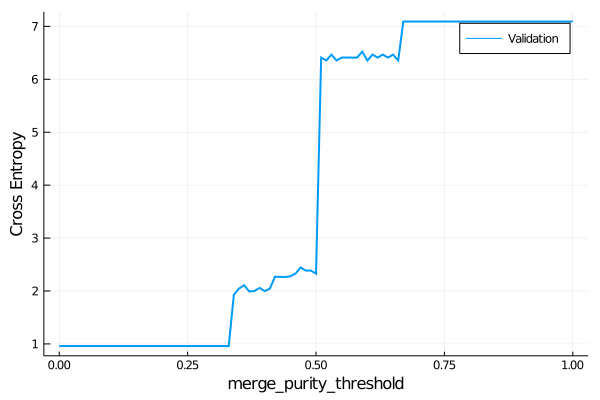

In [108]:
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2)
# plot!(Net2.report.training_losses, label="Training", lw=2)

In [109]:
a = round(minimum(curve.measurements), digits=5)

0.9595

In [110]:
param1 = :merge_purity_threshold

r1 = range(dt2, param1, lower=0, upper=1, scale=:linear)

MLJBase.NumericRange(Float64, :merge_purity_threshold, ... )

In [111]:
self_tuning_dt_model = TunedModel(model=dt2,
                                    tuning=Grid(goal=100),
                                    resampling=CV(), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1])

ProbabilisticTunedModel(
    model = DecisionTreeClassifier(
            max_depth = -1,
            min_samples_leaf = 1,
            min_samples_split = 2,
            min_purity_increase = 0.0,
            n_subfeatures = 0,
            post_prune = true,
            merge_purity_threshold = 1.0,
            pdf_smoothing = 0.0,
            display_depth = 5),
    tuning = Grid(
            goal = 100,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Float64,MLJBase.Bounded,Symbol}[NumericRange{Float64,…} @027],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(not

In [112]:
self_tuning_dt = machine(self_tuning_dt_model, X, y)

Machine{ProbabilisticTunedModel{Grid,…}} @579 trained 0 times.
  args: 
    1:	Source @516 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @966 ⏎ `AbstractArray{Multiclass{3},1}`


In [113]:
z = fit!(self_tuning_dt, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @579.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 100 metamodels: 100%[=========================] Time: 0:00:00


Machine{ProbabilisticTunedModel{Grid,…}} @579 trained 1 time.
  args: 
    1:	Source @516 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @966 ⏎ `AbstractArray{Multiclass{3},1}`


In [114]:
best = fitted_params(self_tuning_dt)
best

(best_model = DecisionTreeClassifier @336,
 best_fitted_params = (tree = Decision Leaf
Majority: 2
Samples:  438,
                       encoding = Dict{CategoricalValue{String,UInt32},UInt32}("B" => 0x00000001,"L" => 0x00000002,"R" => 0x00000003),),)

In [115]:
best.best_model

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 0.2828282828282828,
    pdf_smoothing = 0.0,
    display_depth = 5) @336

In [116]:
best_loss = round(z.report.best_result.measurement[1],digits=5)
best_mpt = round(best.best_model.merge_purity_threshold,digits=5)

0.28283

In [31]:
fn = "Figures/LearningCurve_DT_merge_purity_thresh:$(best_mpt)_loss:$(best_loss)"
png(replace(fn,'.' => ','))

### Learning Curve

In [117]:
data_schedule, training_losses, valid_losses = learn_curve(best.best_model, X[train,:], y[train], acc)

(d, train_metric, valid_metric) = (10, 0.7, 0.42045454545454547)
(d, train_metric, valid_metric) = (11, 0.6363636363636364, 0.42045454545454547)
(d, train_metric, valid_metric) = (12, 0.5833333333333334, 0.42045454545454547)
(d, train_metric, valid_metric) = (13, 0.6153846153846154, 0.42045454545454547)
(d, train_metric, valid_metric) = (14, 0.6428571428571429, 0.42045454545454547)
(d, train_metric, valid_metric) = (15, 0.6, 0.42045454545454547)
(d, train_metric, valid_metric) = (16, 0.5625, 0.42045454545454547)
(d, train_metric, valid_metric) = (17, 0.5882352941176471, 0.42045454545454547)
(d, train_metric, valid_metric) = (18, 0.6111111111111112, 0.42045454545454547)
(d, train_metric, valid_metric) = (19, 0.5789473684210527, 0.42045454545454547)
(d, train_metric, valid_metric) = (20, 0.55, 0.42045454545454547)
(d, train_metric, valid_metric) = (21, 0.5238095238095238, 0.42045454545454547)
(d, train_metric, valid_metric) = (22, 0.5, 0.42045454545454547)
(d, train_metric, valid_metric)

(d, train_metric, valid_metric) = (115, 0.4608695652173913, 0.42045454545454547)
(d, train_metric, valid_metric) = (116, 0.46551724137931033, 0.42045454545454547)
(d, train_metric, valid_metric) = (117, 0.4700854700854701, 0.42045454545454547)
(d, train_metric, valid_metric) = (118, 0.4661016949152542, 0.42045454545454547)
(d, train_metric, valid_metric) = (119, 0.46218487394957986, 0.42045454545454547)
(d, train_metric, valid_metric) = (120, 0.4666666666666667, 0.42045454545454547)
(d, train_metric, valid_metric) = (121, 0.4628099173553719, 0.42045454545454547)
(d, train_metric, valid_metric) = (122, 0.4672131147540984, 0.42045454545454547)
(d, train_metric, valid_metric) = (123, 0.4715447154471545, 0.42045454545454547)
(d, train_metric, valid_metric) = (124, 0.46774193548387094, 0.42045454545454547)
(d, train_metric, valid_metric) = (125, 0.472, 0.42045454545454547)
(d, train_metric, valid_metric) = (126, 0.46825396825396826, 0.42045454545454547)
(d, train_metric, valid_metric) = (12

(d, train_metric, valid_metric) = (258, 0.47674418604651164, 0.42045454545454547)
(d, train_metric, valid_metric) = (259, 0.4749034749034749, 0.42045454545454547)
(d, train_metric, valid_metric) = (260, 0.47307692307692306, 0.42045454545454547)
(d, train_metric, valid_metric) = (261, 0.47509578544061304, 0.42045454545454547)
(d, train_metric, valid_metric) = (262, 0.4732824427480916, 0.42045454545454547)
(d, train_metric, valid_metric) = (263, 0.4714828897338403, 0.42045454545454547)
(d, train_metric, valid_metric) = (264, 0.4696969696969697, 0.42045454545454547)
(d, train_metric, valid_metric) = (265, 0.4679245283018868, 0.42045454545454547)
(d, train_metric, valid_metric) = (266, 0.46616541353383456, 0.42045454545454547)
(d, train_metric, valid_metric) = (267, 0.46441947565543074, 0.42045454545454547)
(d, train_metric, valid_metric) = (268, 0.4626865671641791, 0.42045454545454547)
(d, train_metric, valid_metric) = (269, 0.46096654275092935, 0.42045454545454547)
(d, train_metric, vali

(10:1:350, Any[0.7, 0.6363636363636364, 0.5833333333333334, 0.6153846153846154, 0.6428571428571429, 0.6, 0.5625, 0.5882352941176471, 0.6111111111111112, 0.5789473684210527  …  0.47214076246334313, 0.47368421052631576, 0.47230320699708456, 0.4738372093023256, 0.47246376811594204, 0.47398843930635837, 0.4755043227665706, 0.47413793103448276, 0.47277936962750716, 0.4714285714285714], Any[0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547  …  0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547, 0.42045454545454547])

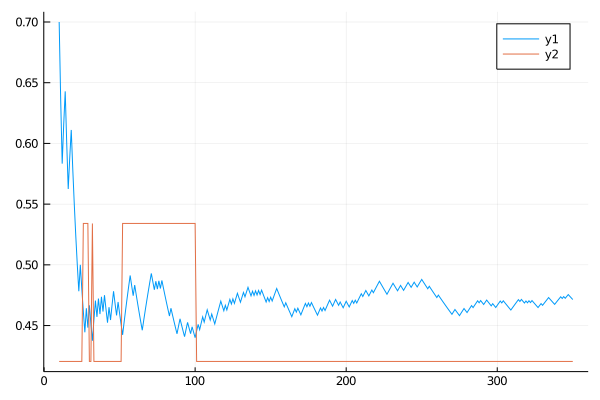

In [118]:
plot(data_schedule, training_losses)
plot!(data_schedule, valid_losses)

# Final Results

In [119]:
final_dt = best.best_model

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 0.2828282828282828,
    pdf_smoothing = 0.0,
    display_depth = 5) @336

In [120]:
Final_Tree = machine(final_dt, X, y)

Machine{DecisionTreeClassifier} @640 trained 0 times.
  args: 
    1:	Source @307 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @576 ⏎ `AbstractArray{Multiclass{3},1}`


In [121]:
fit!(Final_Tree, rows=train, verbosity=2)

2 : 202/438


┌ Info: Training Machine{DecisionTreeClassifier} @640.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{DecisionTreeClassifier} @640 trained 1 time.
  args: 
    1:	Source @307 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @576 ⏎ `AbstractArray{Multiclass{3},1}`


In [123]:
ŷ2 = MLJ.predict(Final_Tree, X[test,:]);

In [124]:
cross_entropy(ŷ2, y[test]) |> mean

0.9168849434125446

In [125]:
acc(ŷ2, y[test])

0.45989304812834225

In [ ]:
confusion_matrix(mode.(ŷ), y[test])